Import des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import du dataset

In [2]:
path = './dataset/'
fj = pd.read_csv(path+'fake_job_postings.csv')
print(fj.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [3]:
fj.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Colonne non-utiles à la prediction : job_id
Colonne de résultat : fraudulent
Problème : la colonne 'salary_range' ne contient que 2868 lignes non null, je décide donc d'enlever cette colonne afin de conserver un maximum de lignes sans biais.

## Nettoyage du dataset

In [4]:
fj.drop(columns=['salary_range', 'job_id'], inplace=True)
fj.fillna("", inplace=True )
fj.drop_duplicates(inplace=True)

# 95% d'offres réelles pour 5% d'offres frauduleuses (graphique avec matplotlib et seaborn)

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

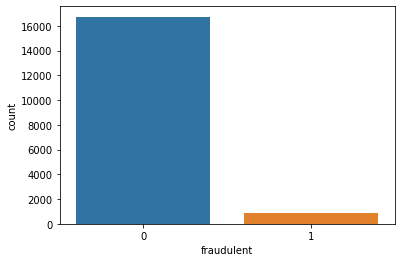

In [5]:
# Graph avec seaborn
sns.countplot(x="fraudulent", data=fj)

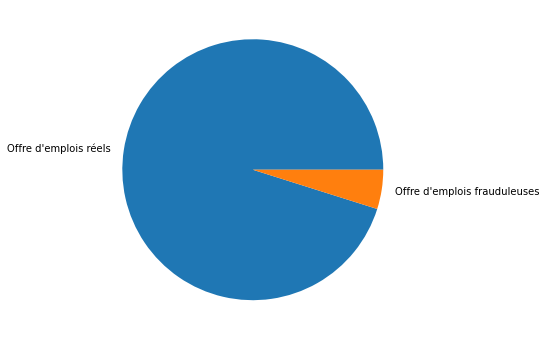

In [6]:
# Graph (plus parlant) avec Matplot lib
fig, axes = plt.subplots(figsize=(15,6))
plt.pie(x=fj["fraudulent"].value_counts(), labels=["Offre d'emplois réels", "Offre d'emplois frauduleuses"])
plt.show()

# Les variables du dataset sont essentiellement des variables catégoriques

### On définit nos variables de travail

In [7]:
y = fj['fraudulent']
data = fj.drop(columns=['fraudulent'])
X = data
X

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design


### On encode les variables catégoriques :
#### Les variables company_profile, description, requirements et benefits sont des variables textuelles contenant de longues phrases, nous n'allons donc pas les utiliser dans cette analyse catégorique, cependant il pourrait etre pertinent de les utiliser dans une approche textuelle pure

In [8]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

X['title'] = lb.fit_transform(fj['title'])
X['location'] = lb.fit_transform(fj['location'])
X['department'] = lb.fit_transform(fj['department'])

X['employment_type'] = lb.fit_transform(fj['employment_type'])
X['required_experience'] = lb.fit_transform(fj['required_experience'])
X['required_education'] = lb.fit_transform(fj['required_education'])
X['industry'] = lb.fit_transform(fj['industry'])
X['function'] = lb.fit_transform(fj['function'])

# on supprime les autres colonnes textuelles :
X.drop(columns=['company_profile', 'description', 'requirements', 'benefits'], inplace=True)

In [9]:
X

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,6043,2536,759,0,1,0,3,5,0,0,23
1,2183,1074,1162,0,1,0,2,7,0,76,8
2,1763,1868,0,0,1,0,0,0,0,0,0
3,299,1704,1055,0,1,0,2,6,2,23,32
4,975,1742,0,0,1,1,2,6,2,52,17
...,...,...,...,...,...,...,...,...,...,...,...
17875,268,167,1055,0,1,1,2,6,0,23,32
17876,7101,2735,63,0,1,1,2,6,2,62,1
17877,7579,2876,0,0,0,0,2,0,0,0,0
17878,4107,1046,0,0,0,1,1,7,7,49,10


### Voyons maintenant les correlations entre les variables grâce à une heatmap :

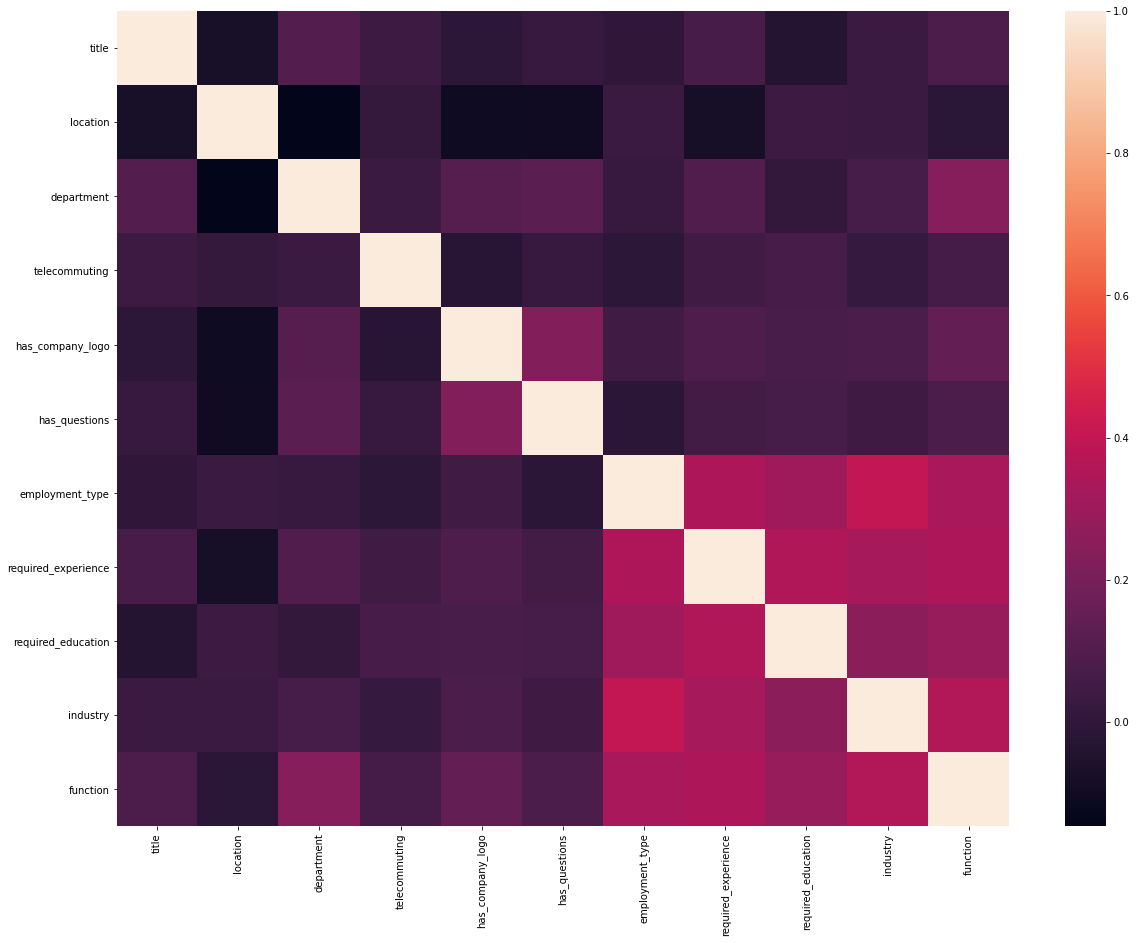

In [10]:
coor_X = X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(coor_X)
plt.show()

#### Ces corrélations ne vont surement pas pouvoir nous aider beaucoup...

# Partie 2 : Le model building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y)

### Nous allons tout d'abord tester avec l'algorithme de régression linéaire :

In [12]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_pred_reg_lin = reg.predict(X_test)
y_test.shape, y_pred_reg_lin.shape

((4398,), (4398,))

In [13]:
#### à partir de là, la suite devient impossible en régression linéaire, donc :

## Le modéle de régression linéaire est efficace pour prédire des variables continus, chiffrés et non des variables catégoriques
#### (Site : javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning)
"Linear Regression is used for solving Regression problem."
"In Linear regression, we predict the value of continuous variables."

"Logistic regression is used for solving Classification problems."
"In logistic Regression, we predict the values of categorical variables."

## Je décide donc d'opter pour un algorithme de régression LOGISTIQUE, pour des raisons évidentes de variables catégoriques

In [14]:
# On instancie l'algo de regression LOGISTIQUE
LgR = LogisticRegression()
LgR.fit(X_train, y_train)

C:\Program Files\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred_reg_log = LgR.predict(X_test)
accuracy_score(y_pred_reg_log, y_test)

0.9508867667121419

No handles with labels found to put in legend.


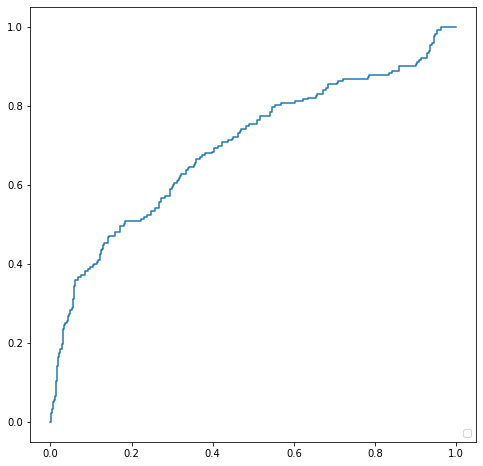

In [61]:
y_pred_reg_log_proba = LgR.predict_proba(X_test)[::,1]
vp, fp, _ = metrics.roc_curve(y_test,  y_pred_reg_log_proba)
auc = metrics.roc_auc_score(y_test, y_pred_reg_log_proba)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(vp, fp)
plt.legend(loc=4)
plt.show()

In [ ]:
LgR = LogisticRegression()
LgR.fit(X_train, y_train)

### Un score de ~95% et une courbe AOC très satisfaisante (peu d'overfitting) ! Cela est déjà très bien, voyons si l'on peut faire encore mieux avec un autre type d'algo

# Random Forest Classifier

In [51]:
cls_forest = RandomForestClassifier(n_estimators = 10)
cls_forest.fit(X_train, y_train)

y_pred_rfc = cls_forest.predict(X_test)
accuracy_score(y_pred_rfc, y_test)

0.9747612551159618

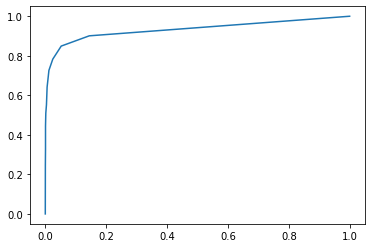

In [52]:
y_pred_rfc_proba = cls_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
auc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)

plt.plot(fpr,tpr)
plt.show()

#### Testons avec des paramétres différents :

In [38]:
cls_forest = RandomForestClassifier(n_estimators = 50)
cls_forest.fit(X_train, y_train)
y_pred_rfc = cls_forest.predict(X_test)
accuracy_score(y_pred_rfc, y_test)

0.9797635288767622

### L'algo semble etre en overfitting (j'ai supprimé les autres tentatives avec différents paramétres, le score et la courbe ROC étant sensiblement identique)

# Pour finir, testons (par ~~gourmandise~~ curiosité) un dernier algorithme : L'algorithme des plus proches voisins
### à préciser que vu notre dataset et notre problèmatique, le KNeighborsClassifier parait très approprié, jetons d'ailleurs un coup d'oeil à ce schéma de choix d'algorithme de Machine learning

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_score(y_pred_knn, y_test)

0.9524783992723965

No handles with labels found to put in legend.


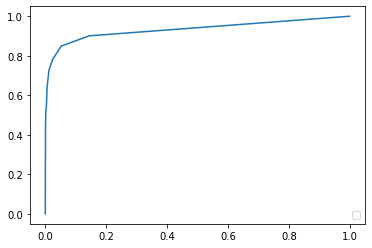

In [54]:
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
auc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)

plt.plot(fpr,tpr)
plt.legend(loc=4)
plt.show()

# Feature importances : 

### Voyons maintenant l'importance de chaque features pour la prédiction effectuée avec le random forest classifier

In [25]:
importances = cls_forest.feature_importances_

<AxesSubplot:>

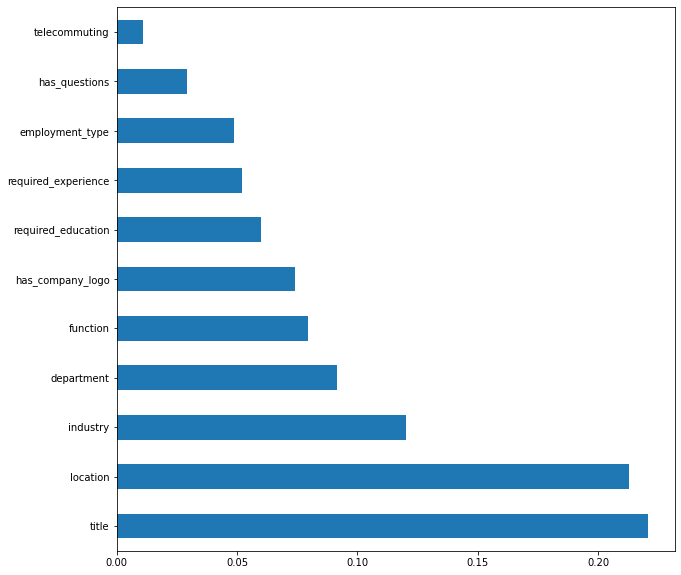

In [33]:
(pd.Series(cls_forest.feature_importances_, index=X.columns)
   .nlargest(14)
   .plot(kind="barh",figsize=(10,10)))

### On voit donc que les variables les plus importantes pour la détection de fausses annonces sont : le titre, la location et le type d'industrie

# Voyons maintenant un rapport de classification et la matrice de confusion 

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4194
           1       0.47      0.20      0.28       204

    accuracy                           0.95      4398
   macro avg       0.72      0.60      0.63      4398
weighted avg       0.94      0.95      0.94      4398



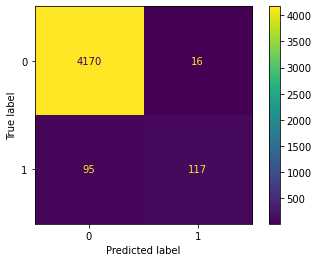

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rfc)
cm_display = ConfusionMatrixDisplay(cm).plot()